In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package

#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [2]:
df = pd.read_csv('data/Chapter_1_cleaned_data.csv')

In [3]:
df['default payment next month'].mean()

0.2217971797179718

In [4]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

• Is the data complete?
Are there missing values or other anomalies?

• Is the data consistent?
Does the distribution change over time, and if so, is this expected?

• Does the data make sense?
Do the values of the features fit with their definition in the data dictionary?

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
my_lr = LogisticRegression()
my_lr

LogisticRegression()

In [7]:
my_new_lr = LogisticRegression(
                                penalty='l2', 
                                dual=False, 
                                tol=0.0001, 
                                C=1.0, 
                                fit_intercept=True, 
                                intercept_scaling=1, 
                                class_weight=None, 
                                random_state=None, 
                                solver='lbfgs', 
                                max_iter=100, 
                                multi_class='auto', 
                                verbose=0, 
                                warm_start=False, 
                                n_jobs=None, 
                                l1_ratio=None
                                )

In [8]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [9]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [10]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [12]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [13]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

Generating Synthetic Data

In [15]:
from numpy.random import default_rng

In [16]:
rg = default_rng(12345)
X = rg.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865])

Data for Linear Regression

In [17]:
slope = 0.25
intercept = -1.25
y = slope * X + rg.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

Text(0, 0.5, 'y')

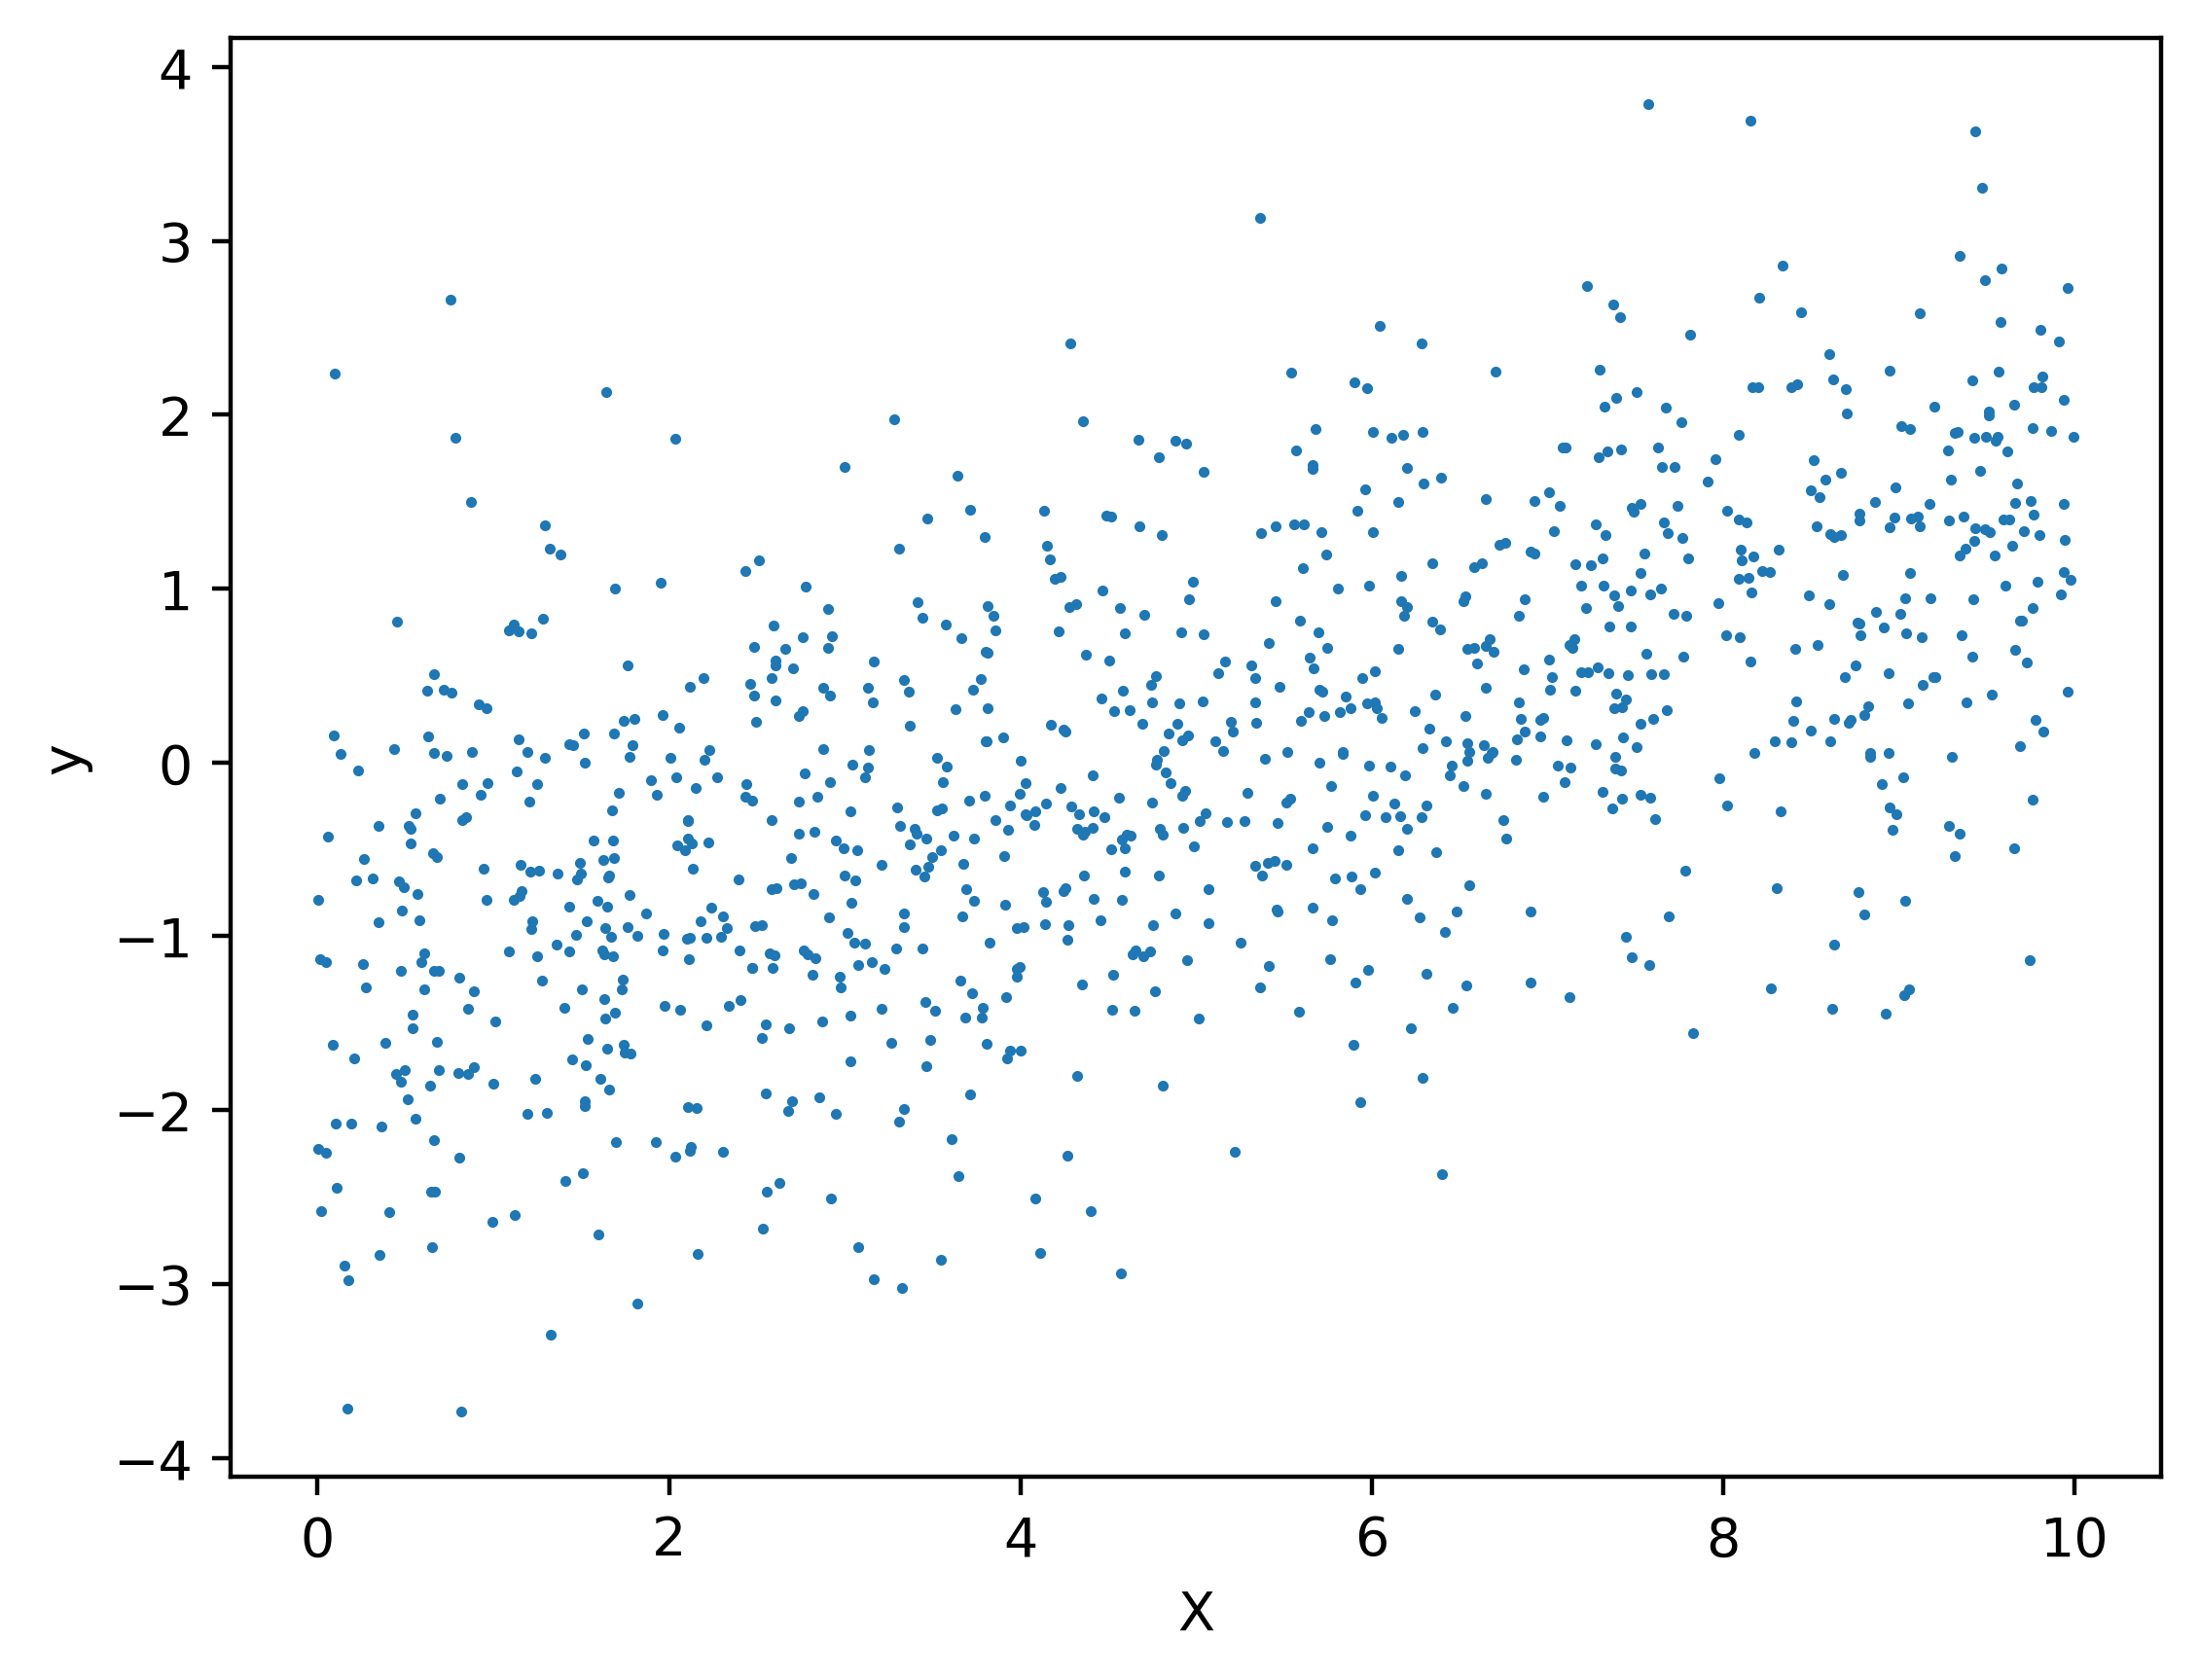

In [18]:
mpl.rcParams['figure.dpi'] = 400
plt.scatter(X,y,s=1)
plt.xlabel('X')
plt.ylabel('y')

Exercise 2.01: Linear Regression in Scikit-Learn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lin_reg = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None
)

lin_reg

LinearRegression()

In [23]:
lin_reg.fit(X.reshape(-1, 1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.2522197212675907
[0.25711689]


In [24]:
y_pred = lin_reg.predict(X.reshape(-1,1))

Text(0, 0.5, 'y')

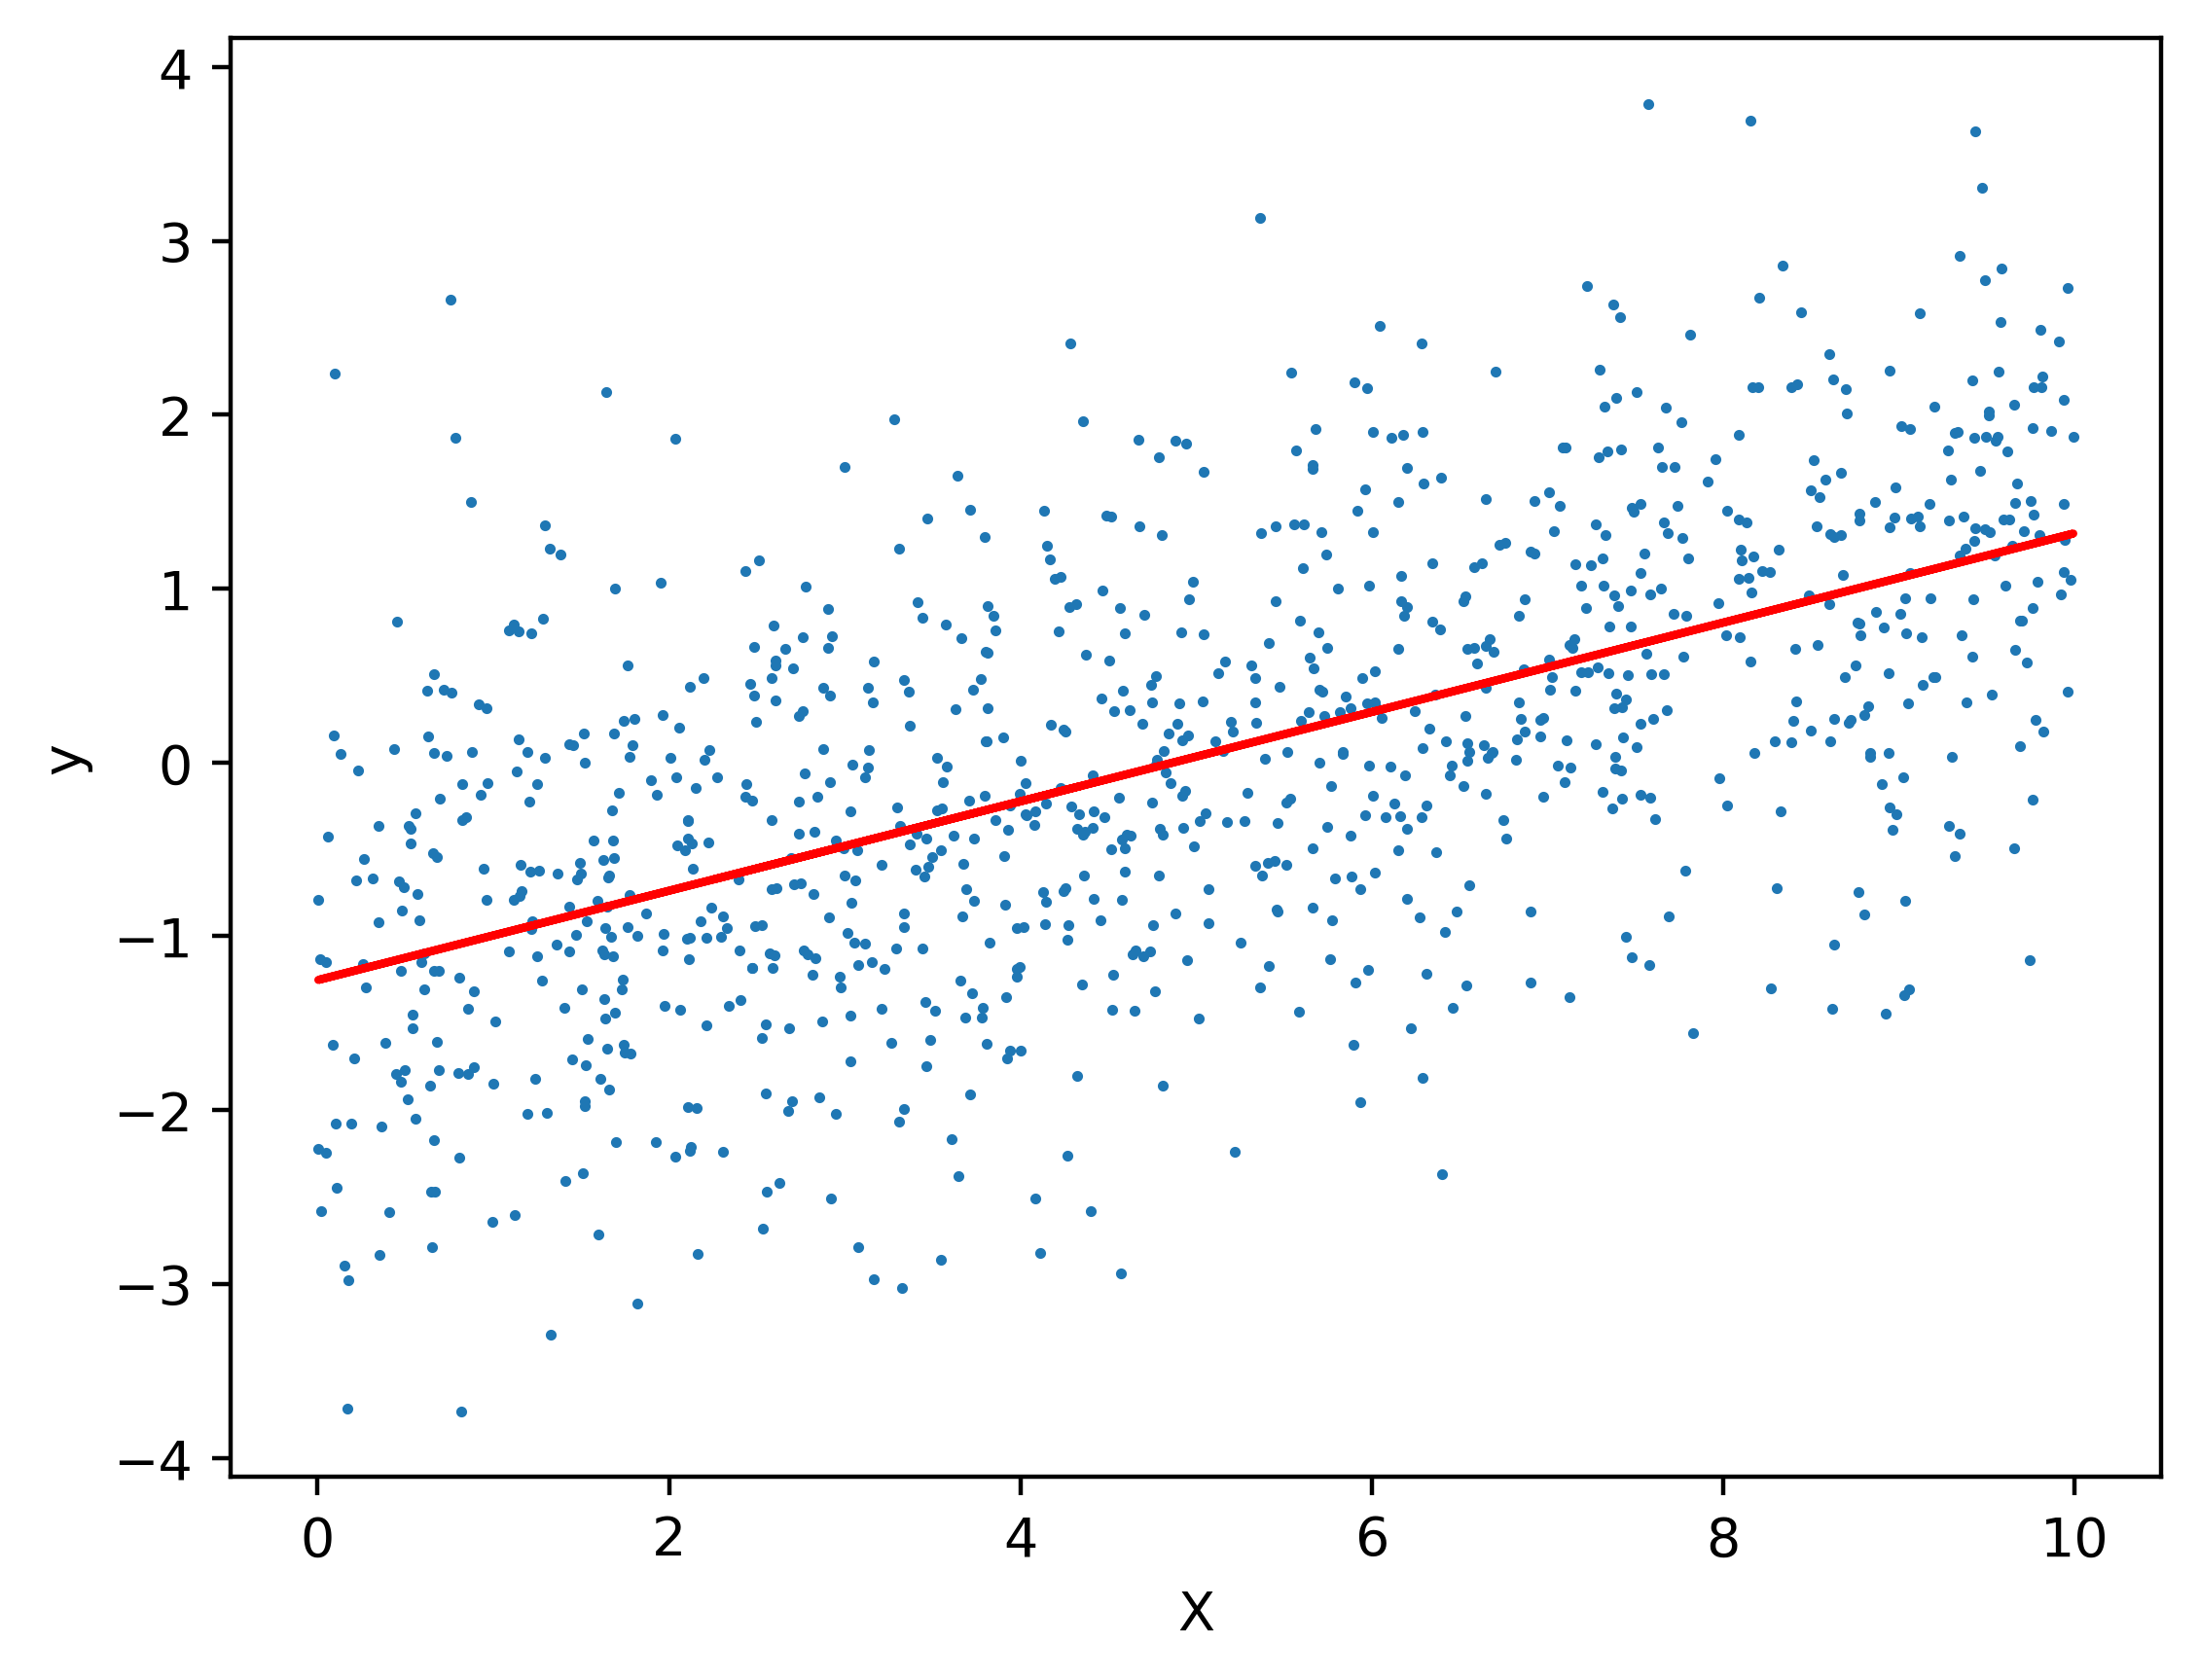

In [25]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')
plt.xlabel('X')
plt.ylabel('y')

Splitting the Data: Training and Test Sets

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1),
                                                    df['default payment next month'].values,
                                                    test_size=0.2, random_state=24)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333, 1)


In [28]:
np.mean(y_train)

0.223102526838873

In [29]:
np.mean(y_test)

0.21657603600225014

Classification Accuracy

In [30]:
from sklearn.linear_model import LogisticRegression

In [34]:
example_lr = LogisticRegression(C=0.1, class_weight=None,
                                dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100,
                                multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None,
                                solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)

In [35]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [36]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [37]:
y_pred = example_lr.predict(X_test)

In [38]:
is_correct = y_pred == y_test

In [39]:
np.mean(is_correct)

0.7834239639977498

In [40]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [41]:
from sklearn import metrics

In [42]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

Exercise 2.02: Calculating the True and False Positive and Negative Rates and 
Confusion Matrix in Python

In [43]:
P = sum(y_test)
P

1155

In [44]:
TP = sum((y_test==1) & (y_pred==1))
TP

0

In [45]:
TPR = TP/P
TPR

0.0

In [46]:
FN = sum((y_test==1) & (y_pred==0))
FN

1155

In [47]:
FNR = FN/P
FNR

1.0

In [48]:
N = sum(y_test==0)
N

4178

In [49]:
TN = sum((y_test==0)&(y_pred==0))
TN

4178

In [50]:
FP = sum((y_test==0)&(y_pred==1))
FP

0

In [51]:
TNR = TN/N
FPR = FP/N

print('TNR is {} and FPR is {}'.format(TNR, FPR))

TNR is 1.0 and FPR is 0.0


In [52]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [56]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [57]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [58]:
prob_sum.shape

(5333,)

In [59]:
np.unique(prob_sum)

array([1.])

In [60]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

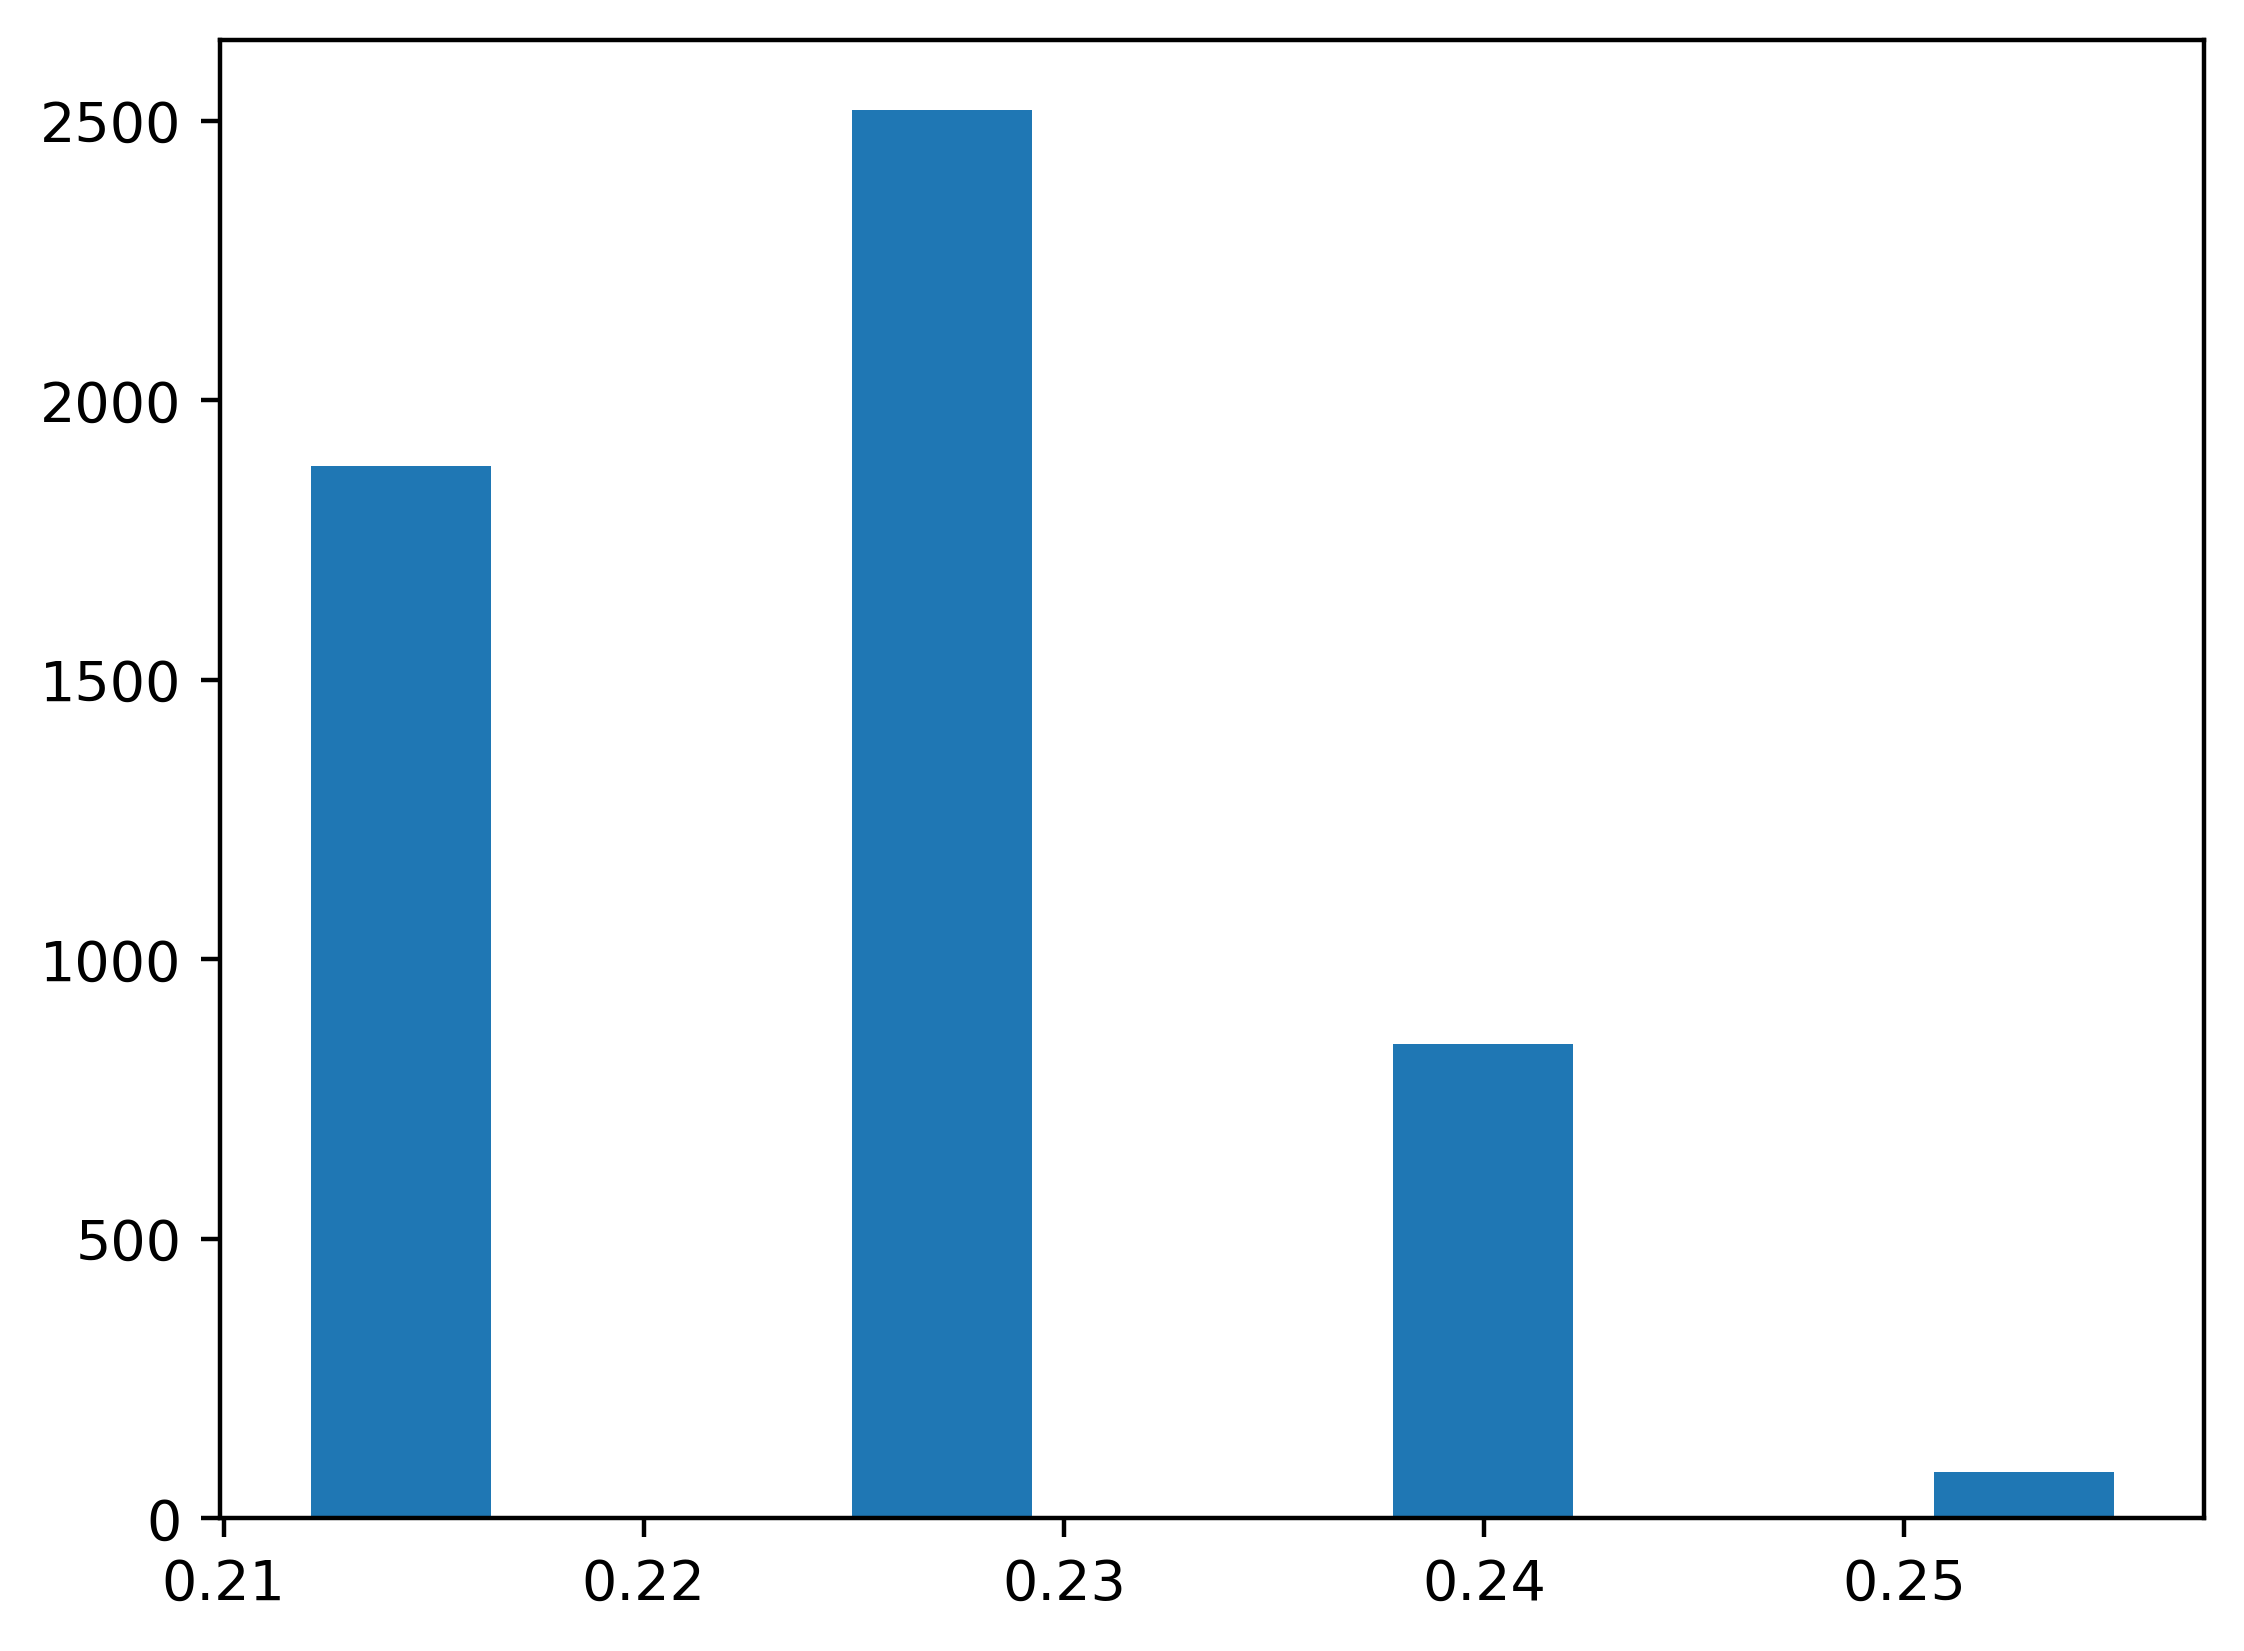

In [61]:
plt.hist(pos_proba)

In [62]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

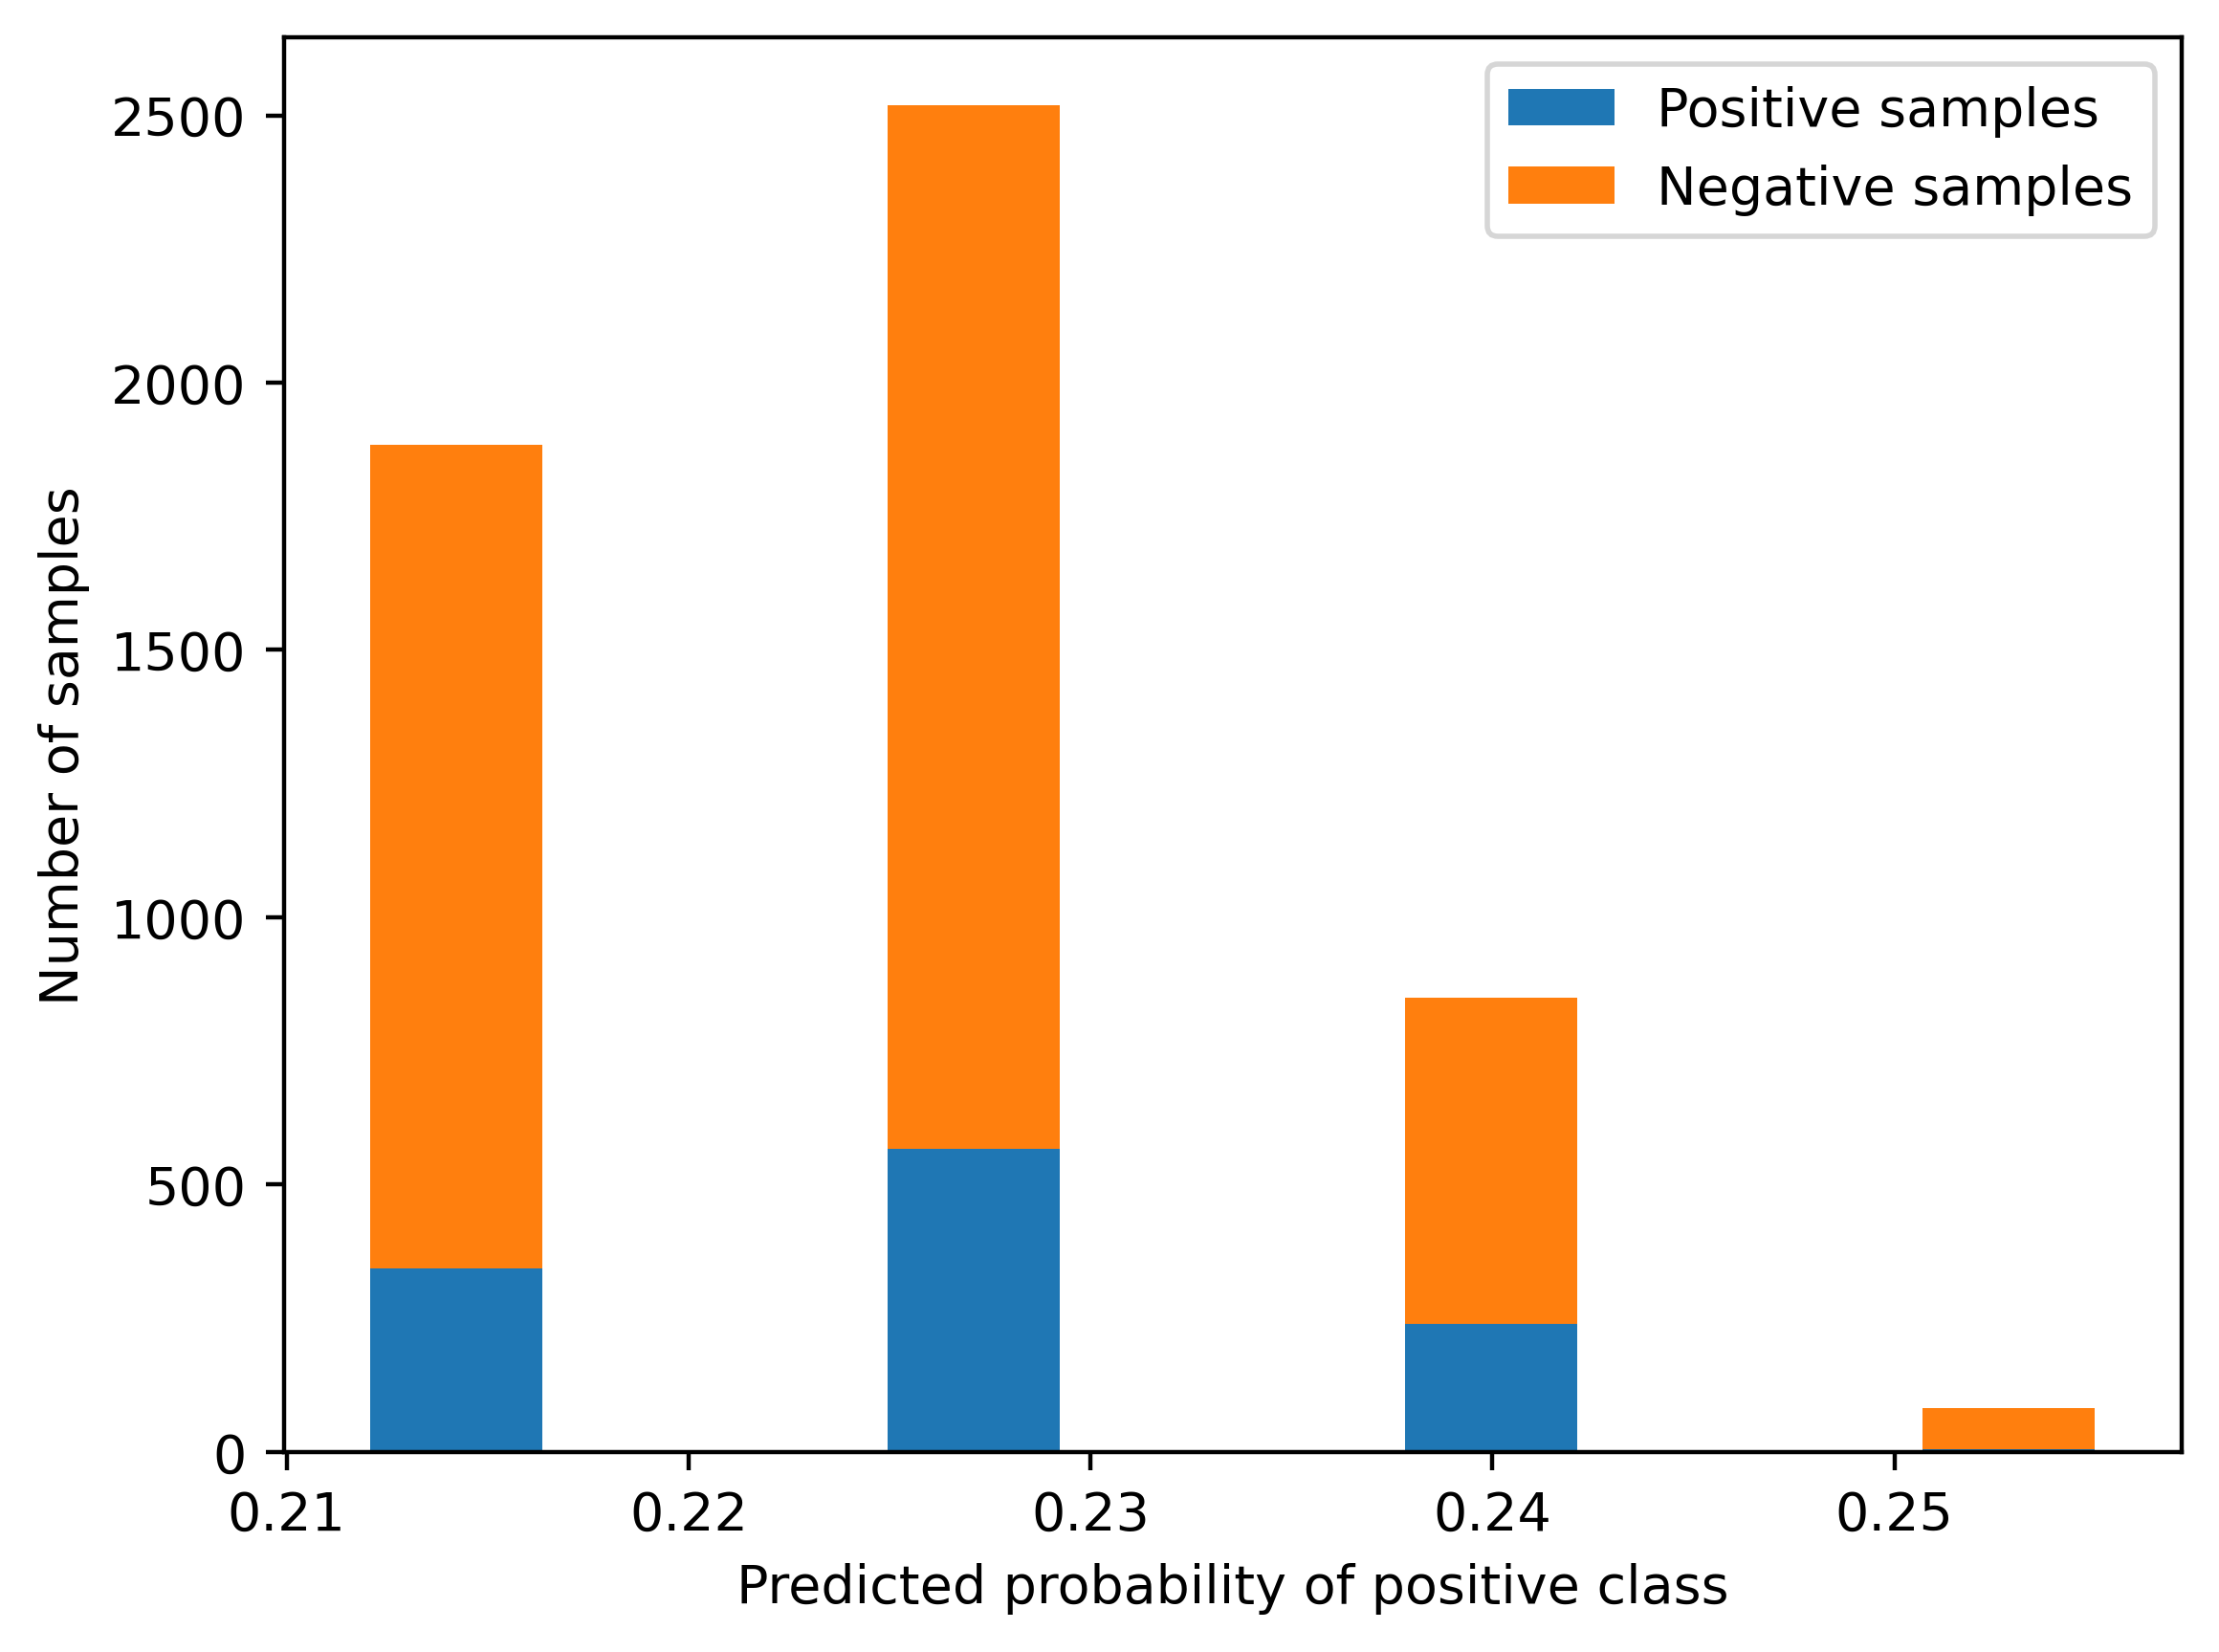

In [63]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

The Receiver Operating Characteristic (ROC) Curve

In [64]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

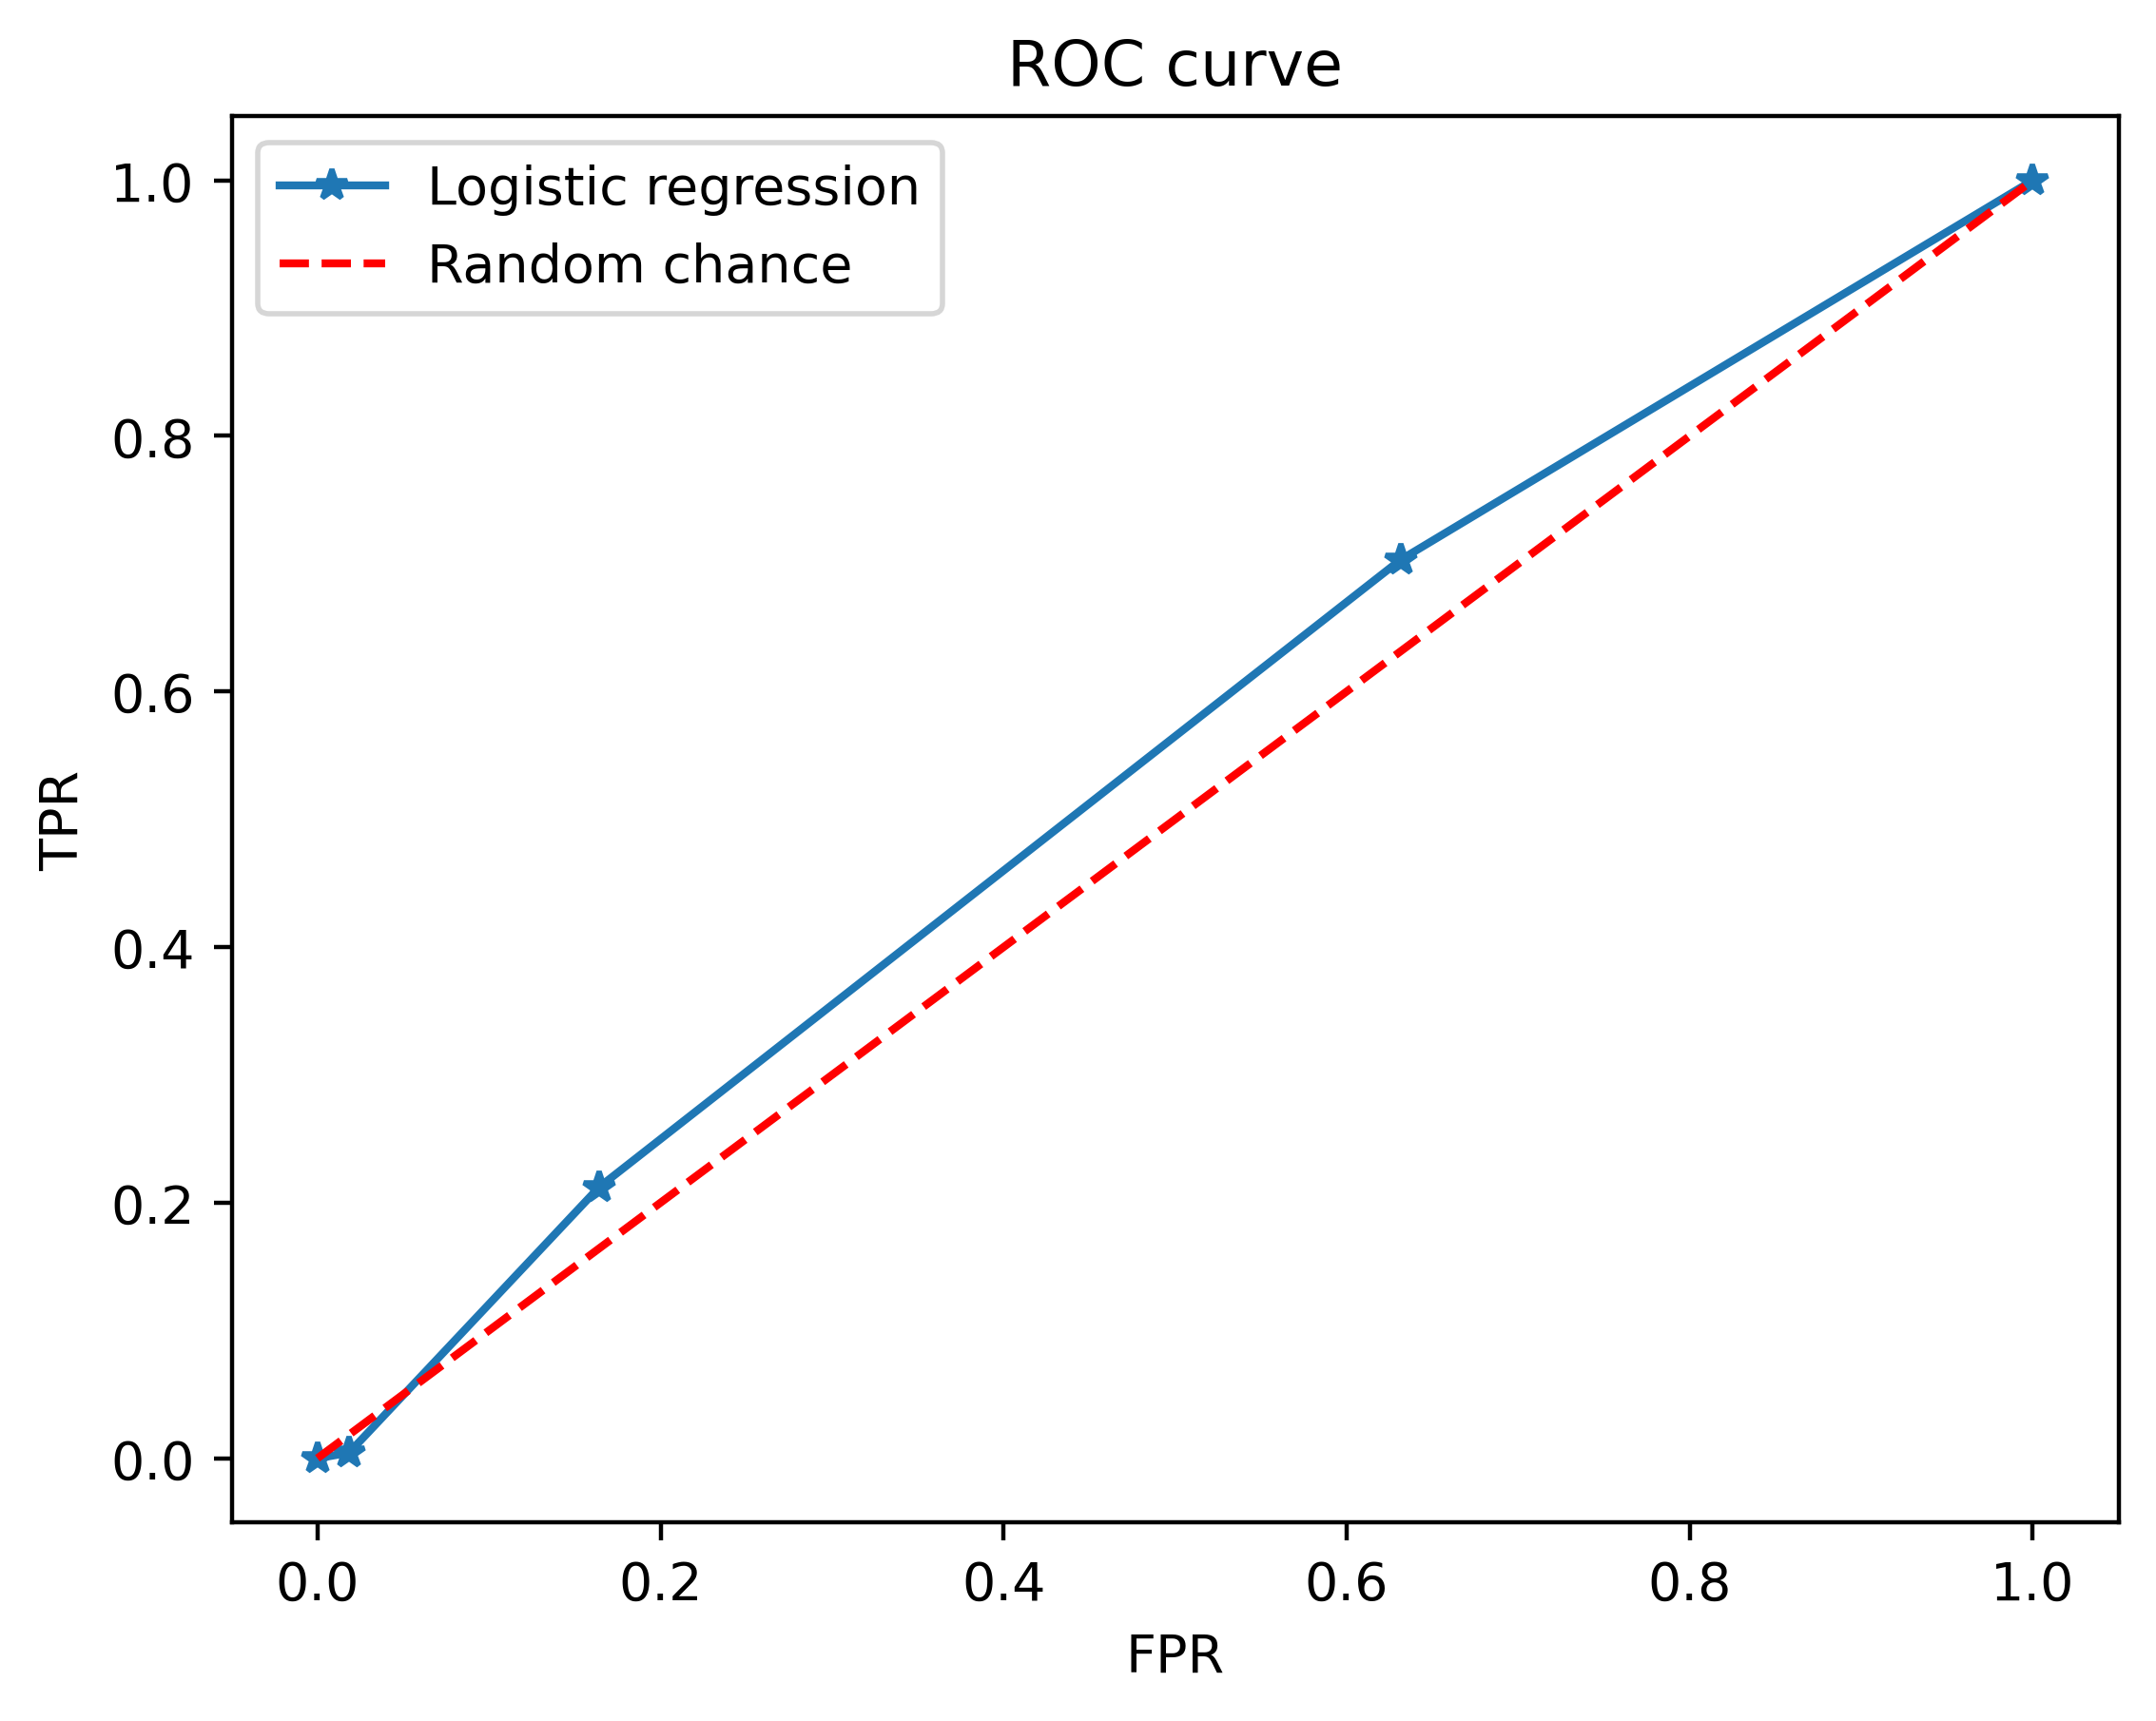

In [65]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [66]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [67]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

Precision

Activity 2.01: Performing Logistic Regression with a New Feature and Creating a 
Precision-Recall Curve

1. Use scikit-learn's train_test_split to make a new set of training and test 
data. This time, instead of EDUCATION, use LIMIT_BAL, the account's credit 
limit, as the feature.
2. Train a logistic regression model using the training data from your split.
3. Create the array of predicted probabilities for the test data.
4. Calculate the ROC AUC using the predicted probabilities and the true labels of 
the test data. Compare this to the ROC AUC from using the EDUCATION feature.
5. Plot the ROC curve.
6. Calculate the data for the precision-recall curve on the test data using scikit-learn's functionality.
7. Plot the precision-recall curve using matplotlib.
8. Use scikit-learn to calculate the area under the precision-recall curve. You should 
get a value of approximately 0.315.
9. Now recalculate the ROC AUC, except this time do it for the training data. How is 
this different, conceptually and quantitatively, from your earlier calculation?

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 12

In [70]:
example_lr = LogisticRegression(C=0.1, class_weight=None,
                                dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100,
                                multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None,
                                solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)

In [71]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    df['LIMIT_BAL'].values.reshape(-1,1),
    df['default payment next month'].values,
    test_size=0.2, random_state=24)

In [72]:
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

In [73]:
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [74]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

In [75]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(
    y_test_2, y_test_2_pred_proba[:,1]
)

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

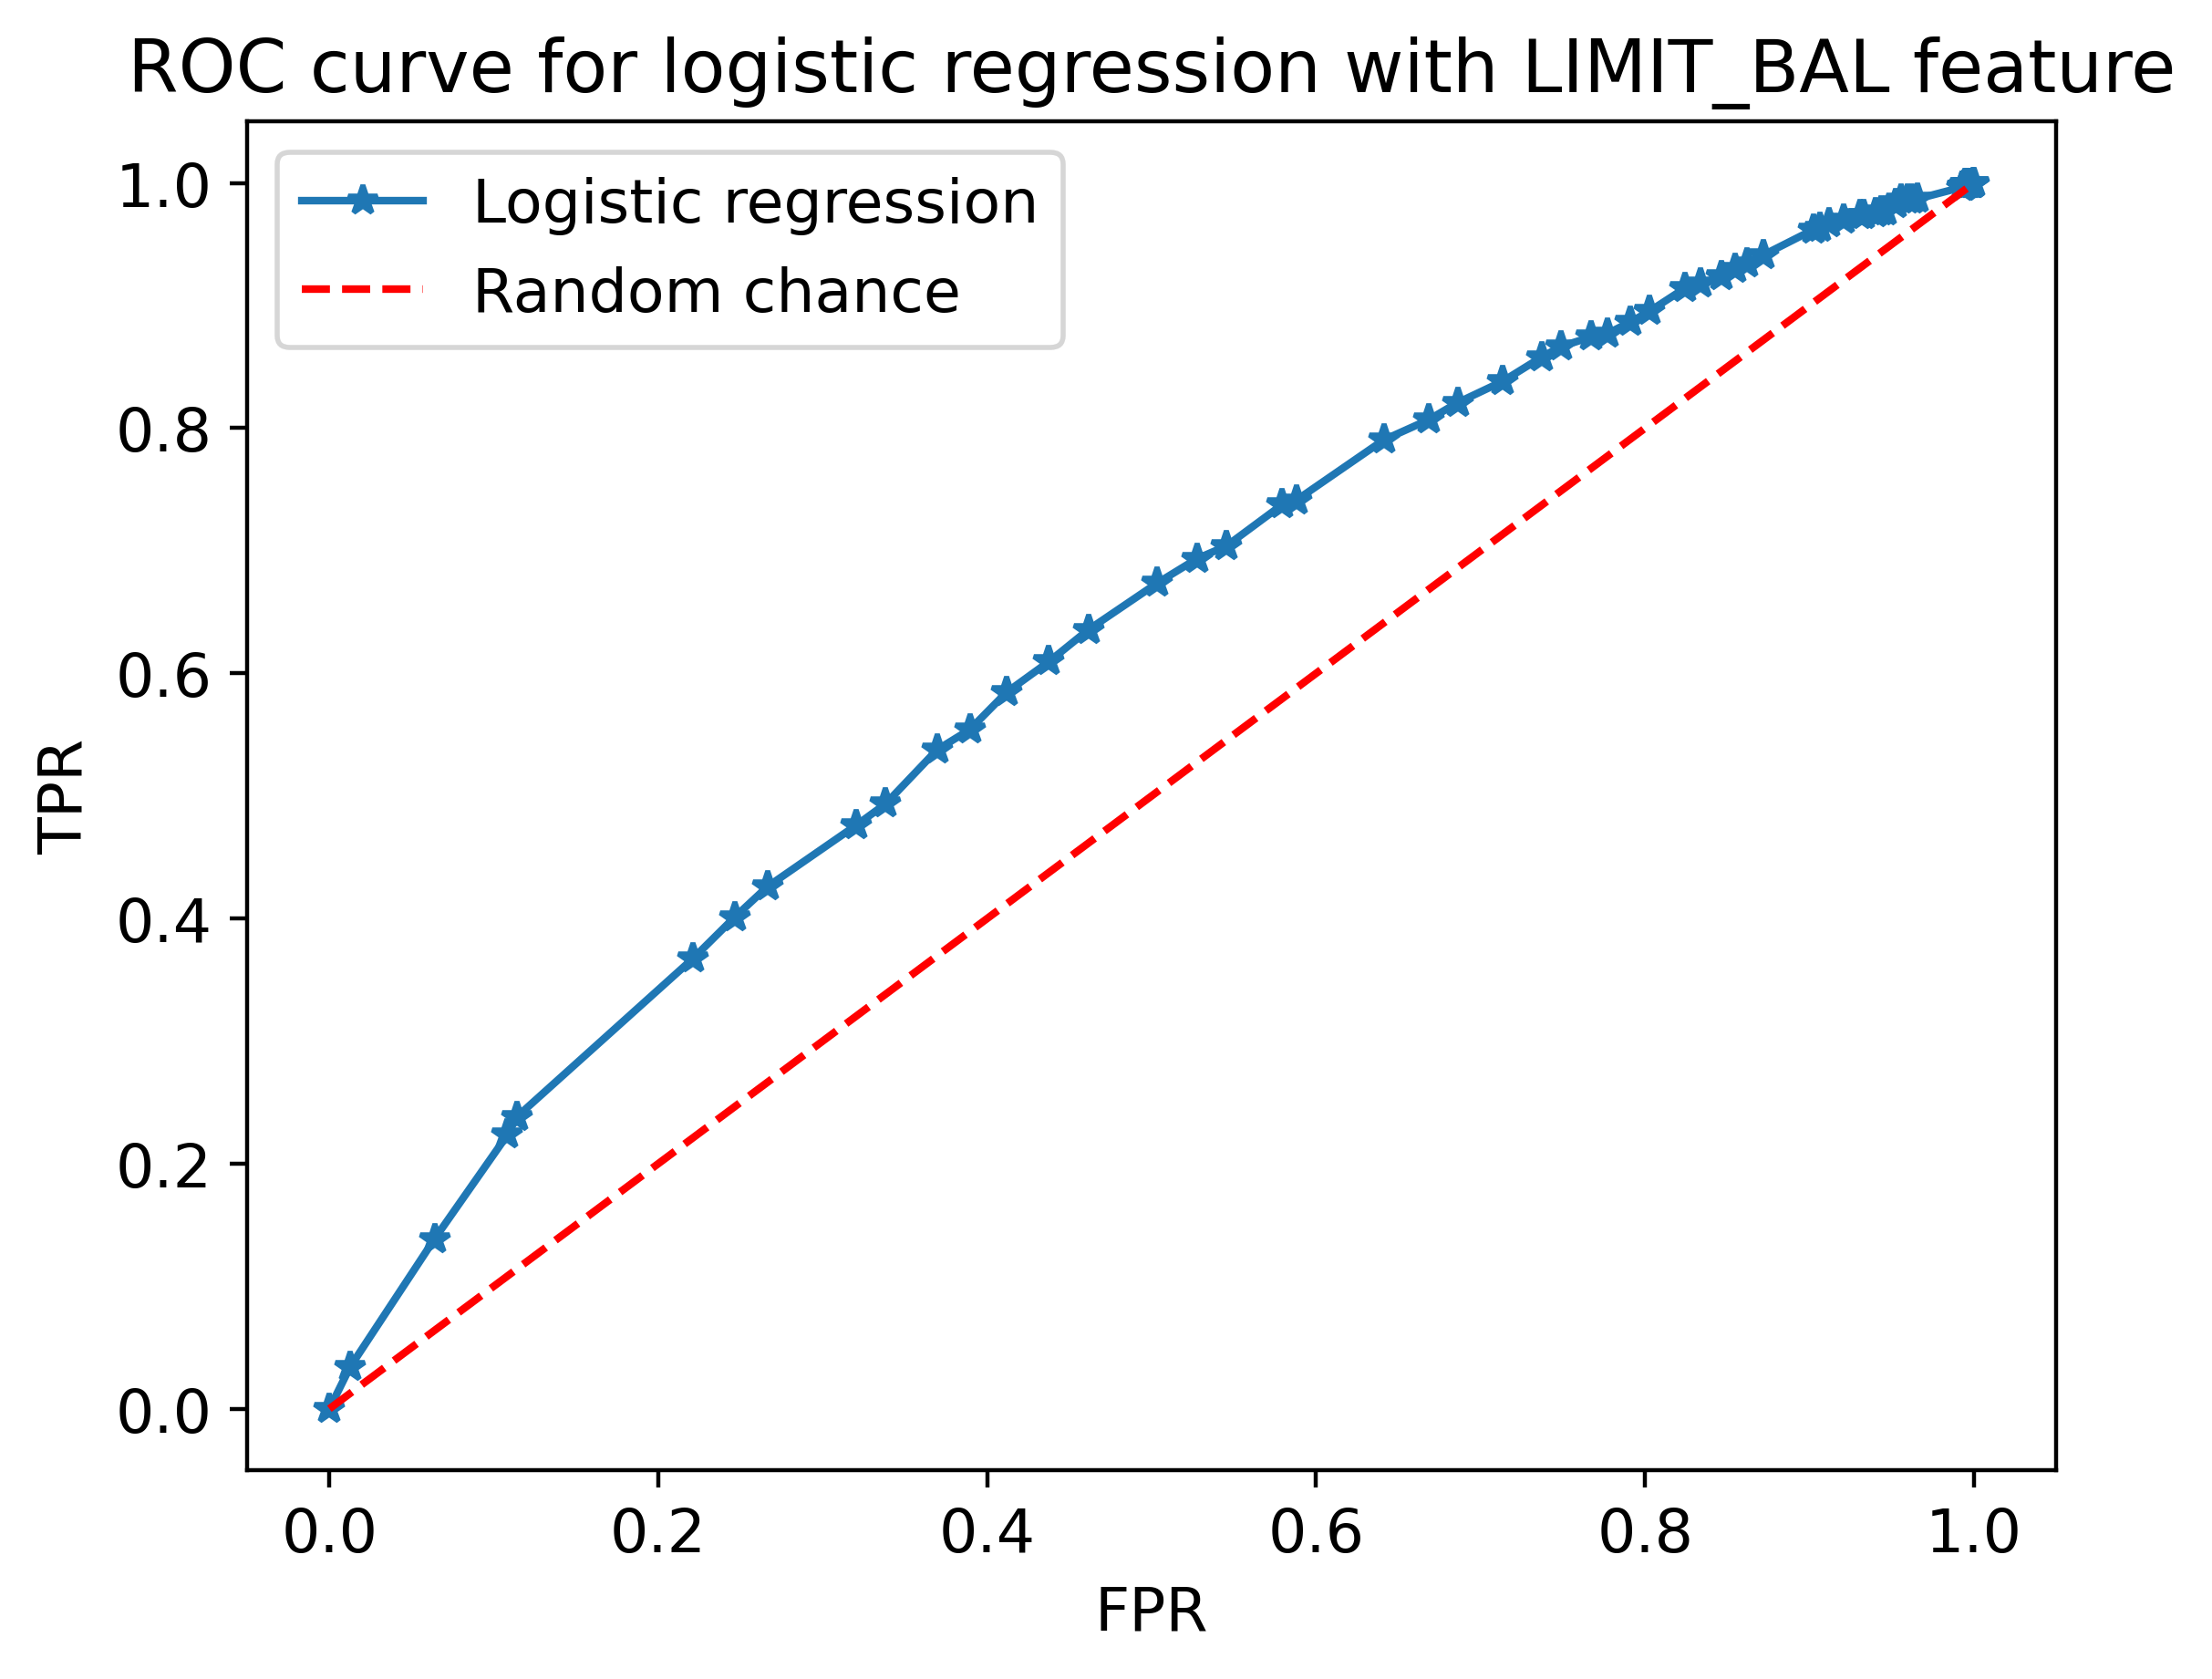

In [76]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [77]:
precision, recall, thresh_3 = metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

(0.0, 1.0)

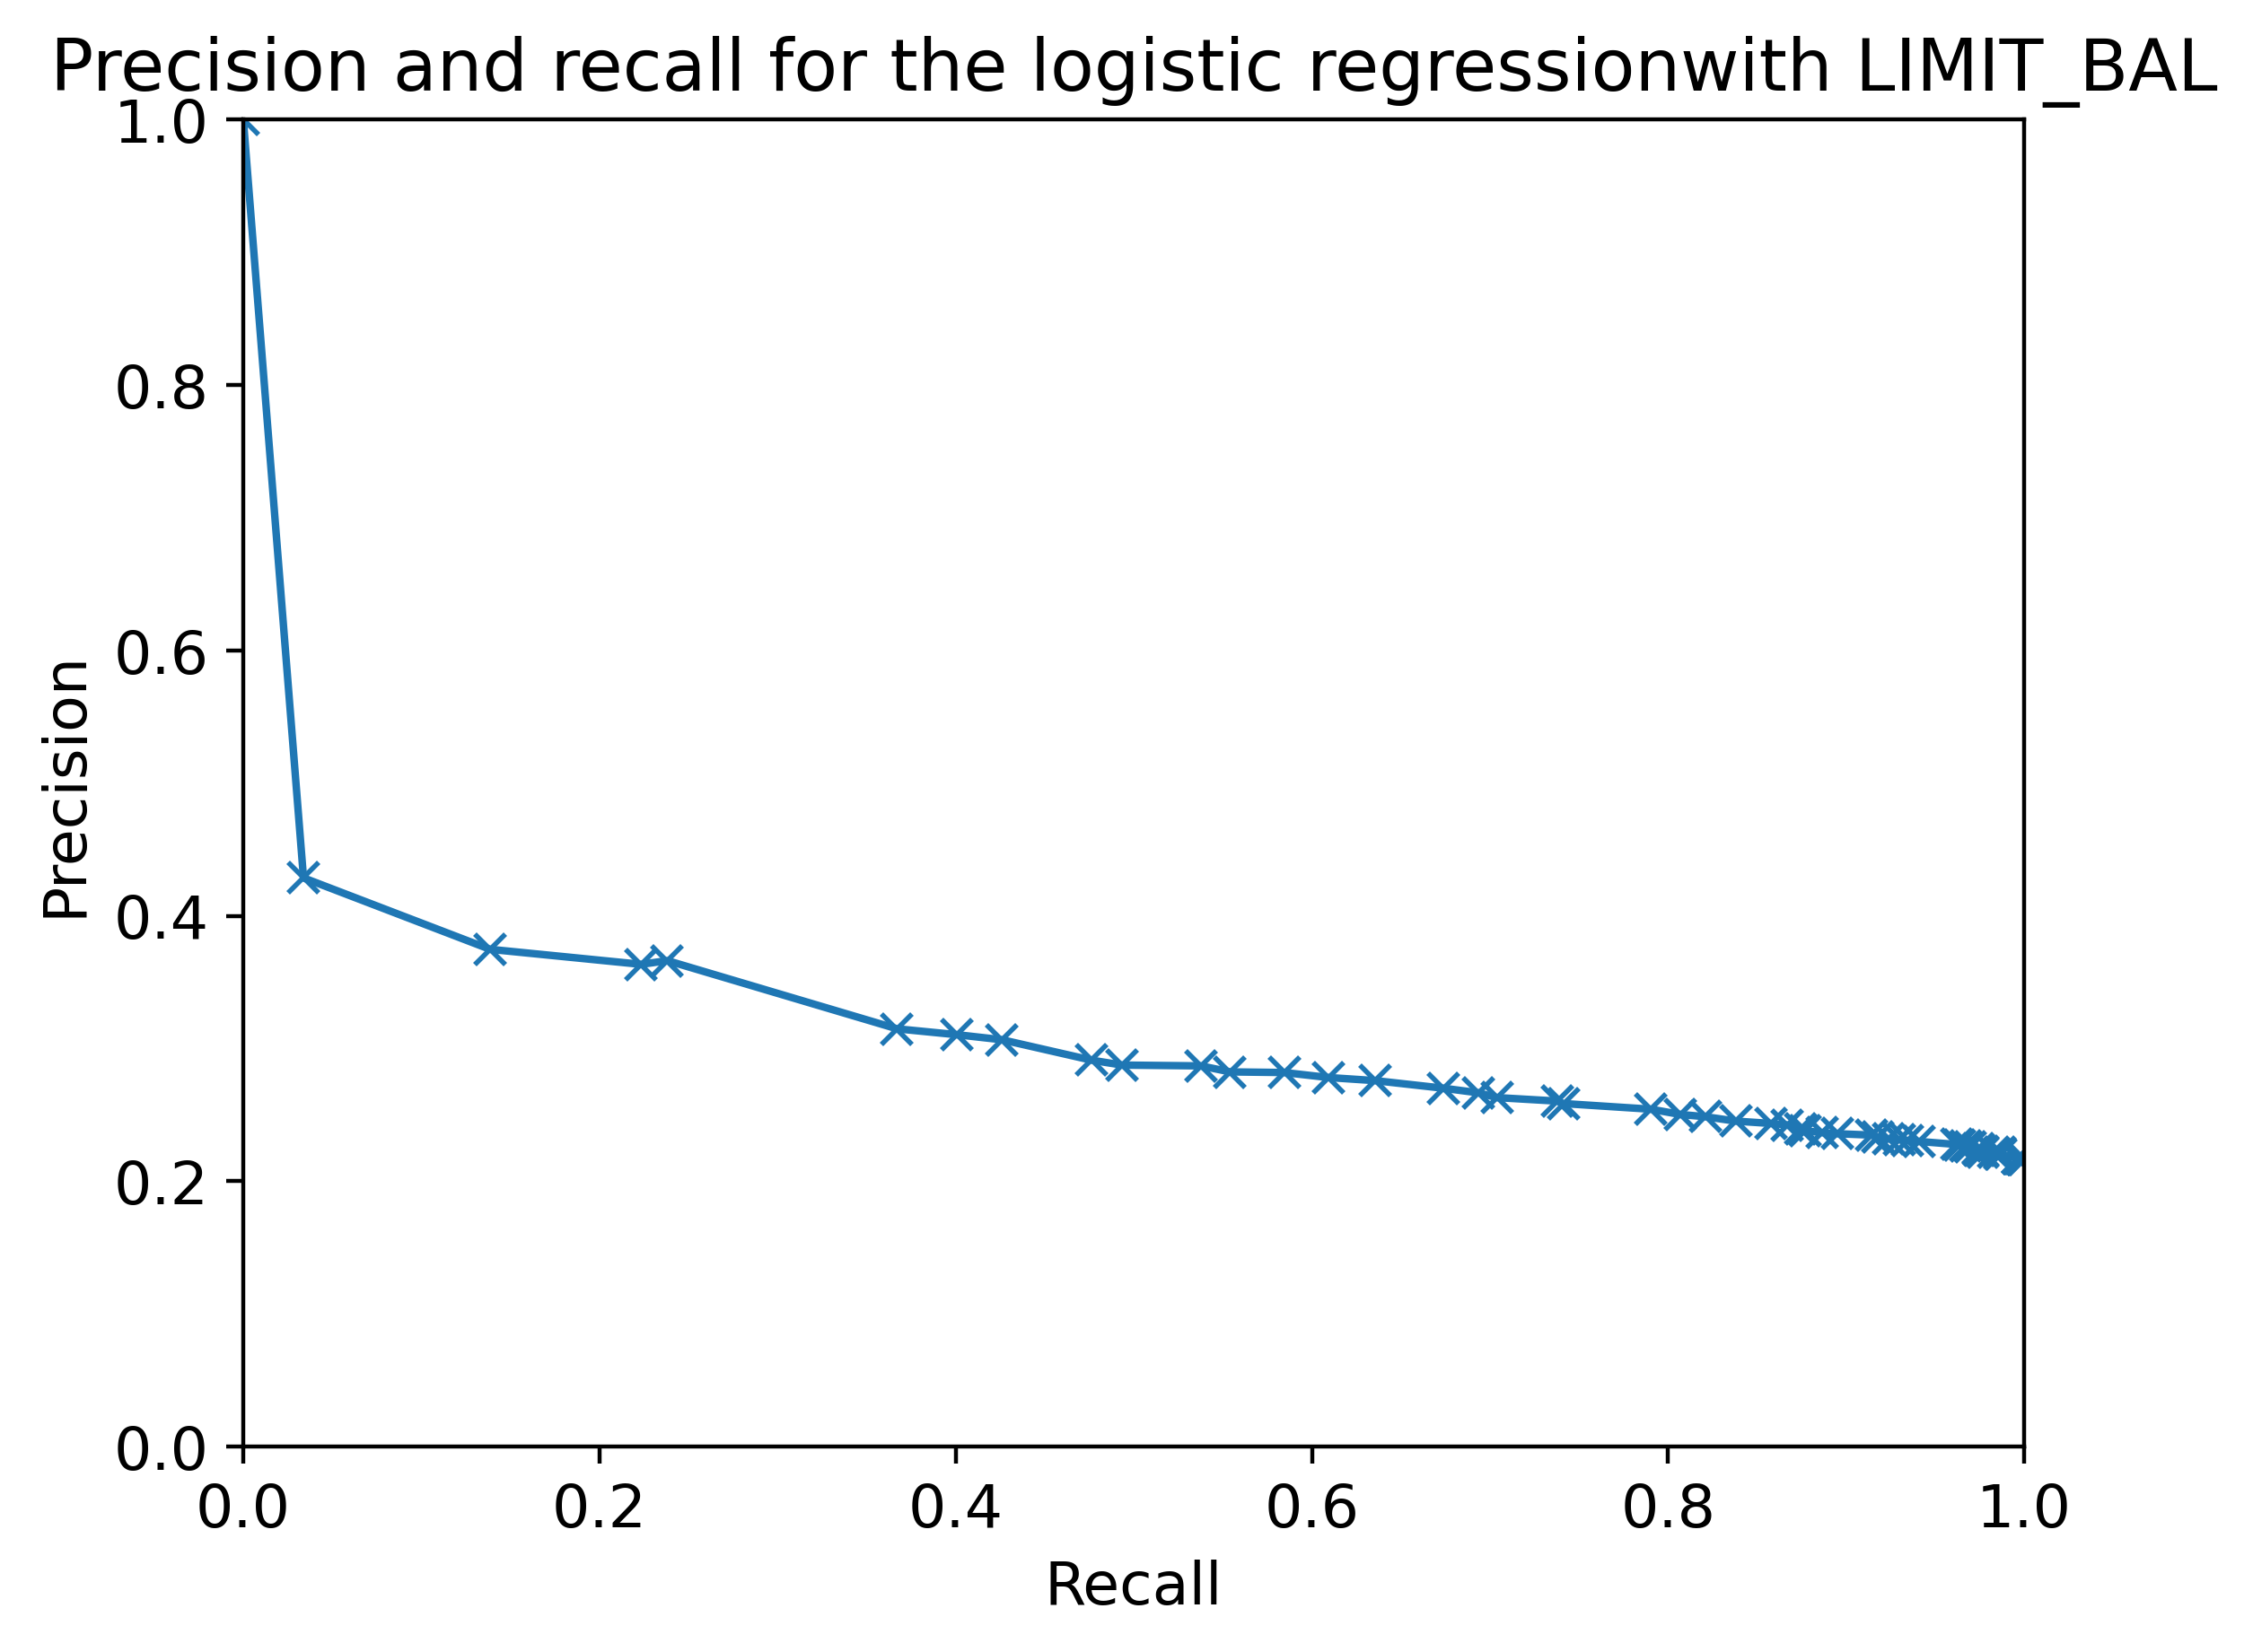

In [78]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression' + 'with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [79]:
metrics.auc(recall, precision)

0.31566964427378624

In [82]:
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)

In [83]:
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:, 1])

0.6182918113358344